# Regression linéaire

Prenons un exemple : j'ai généré des données aléatoires, et tracé un graphique :

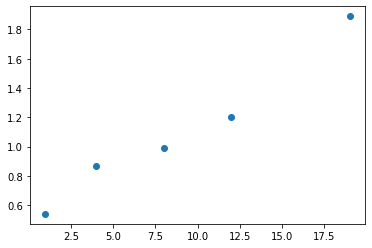

In [9]:
import sys
# nécessaire pour le notebook, à commenter sinon
!{sys.executable} -m pip install matplotlib numpy 
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1,4,8,12,19])
y = np.array([0.54,0.87,0.99,1.20,1.89])

plt.plot(x,y,'o')
plt.show()

L'idée est de réussir à tracer une régression linéaire, et obtenir l'équation de la droite.

Pour obtenir une régression linéaire à partir de données, et obtenir l'équation de la droite, on utilise un nouveau module : **`scipy.stats`**. C'est à dire le module "stats" contenu dans la librairie `scipy`. Et dans ce module, c'est la fonction `linregress` qui nous interesse.

On peut donc au choix importer la fonction seulement :

```python
from scipy.stats import linregress
#La fonction sera maintenant disponible directement, exemple d'appel :
>>>linregress(...)
```

## Linregress

Lorsqu'on trouve qu'une fonction ou un module répond à notre problème, il est conseillé de commencer par lire la doc. (Ce qui se traduit souvent dans la culture informatique par la réponse "RTFM" (***Read the f*cking manual***) à une question posée...

> Lien vers la doc de Linregress : https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

Autre approche : Regarder un exemple pour comprendre le fonctionnement, et ensuite lire la doc si besoin.

In [10]:
#Import des modules
import sys
!{sys.executable} -m pip install matplotlib numpy scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

#Données x et y
x = np.array([1,4,8,12,19])
y = np.array([0.54,0.87,0.99,1.20,1.89])

#On stocke le résultats de fonction regression linéaire dans un fichier reg
reg = linregress(x,y)

Regardons maintenant le contenu de cette variable `reg` :

In [11]:
reg

LinregressResult(slope=0.0701106639839034, intercept=0.4810261569416501, rvalue=0.9823271641321523, pvalue=0.002812798260410732, stderr=0.007712729271197591)

Cette variable contient :
- slope : la pente (coefficient directeur)
- intercept : la valeur à l'origine
- rvalue : coefficient de corrélation (le plus proche de 1 est le mieux)

On peut donc facilement tracer la regression linéaire :
$ y = a \times x + b  $ qui ici correspond à $ y = slope \times x + intercept $

On récupère le coefficient directeur "a" par la première valeur, soit `reg[0]` ; et l'ordonnée à l'origine par `reg[1]`

On peut maintenant tracer la droite : 

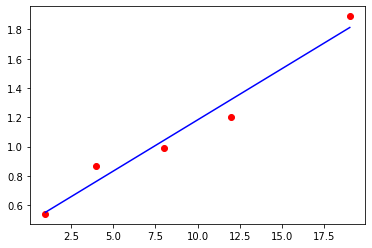

In [12]:
#données
x = np.array([1,4,8,12,19])
y = np.array([0.54,0.87,0.99,1.20,1.89])

#regression lineaire
reg = linregress(x,y)
coef = reg[0] #coef de la droite
ordonnee = reg[1] #ordonnée à l'origine

#tracé
X = np.array([min(x),max(x)]) #Pour tracer une droite, 2 points sont suffisants
plt.plot(x,y,'or') #les points de mesure
plt.plot(X,coef*X+ordonnee,'b') #numpy permet de calculer directement les valeurs en ordonnée.
plt.show()  #On affiche

## Afficher l'équation de la droite

Tracer la regression linéaire, c'est bien, mais souvent, l'un des objectifs est de trouver l'équation de la droite.
On va donc afficher le "slope", ici reg[0], et l'ordonnée à l'origine "intercept", ici reg[1]
Ca peut être affiché en console. 

Voici un exemple qui l'affiche à coté de la droite.
Le graphique a été enrichi de décorations et peut vous servir de "mémo".

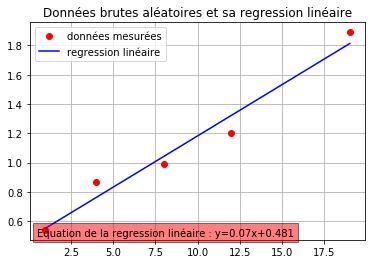

In [13]:
plt.plot(x,y,'or',label='données mesurées')
plt.plot(X,coef*X+ordonnee,'b',label='regression linéaire')
plt.title('Données brutes aléatoires et sa regression linéaire')
plt.text(0.5,0.5,"Equation de la regression linéaire : y="+str(round(coef,3))+"x+"+str(round(ordonnee,3)),bbox=dict(facecolor='red', alpha=0.5)) #Affiche le texte en position 0,5;0,5
plt.legend()
plt.grid()
plt.show()

***Yes ! Encore une opération rondement menée !***